# Sleep Cycle Analyzer
#### This notebook has the purpose of helping users of Sleep Cycle to analyze their data in a more detailed an extensive way.
All What you need is to export your csv data to the folder where this notebook is located

## 1. Imports
Libraries needed for the analysis

In [774]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Import data
Take the data from the folder and create a DataFrame with it

In [775]:
# Name of the file
# You can change this name for your analysis
fileName = 'sleepdata.csv'

#Transform it to data frame, use as separator ; instead of ,
sleepData = pd.read_csv(fileName, sep = ';', parse_dates = ['Start', 'End'])

#Test
sleepData.head(1)

,Start,End,Sleep Quality,Regularity,Mood,Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°F),Weather type,Notes
0,2019-12-24 00:35:05,2019-12-24 07:59:49,76%,—,NaN,0,No alarm,NaN,NaN,3.226314,26684.348,NaN,NaN,False,0,NaN,NaN,NaN


## 3. Useful functions
There are some actions that we are going to do many times, that is why is better to build some functions for them

In [776]:
# Function that plots a small histogram
def plotHist(column, binNum, lab, histTitle):
    plt.figure(figsize=(10, 6))
    plt.hist(x=column, bins=binNum)
    plt.xlabel(lab)
    plt.ylabel('# of elements')
    plt.title(histTitle)
    plt.show() 

## 4. Data Previsualization and Corrections
We need to check how correct is the information collected and if there are empty values in our columns or rows

### 4.1 Simple elements and types

In [777]:
# Check data types
sleepData.dtypes

Start                       datetime64[ns]
End                         datetime64[ns]
Sleep Quality                       object
Regularity                          object
Mood                                object
Steps                                int64
Alarm mode                          object
Air Pressure (Pa)                  float64
City                                object
Movements per hour                 float64
Time in bed (seconds)              float64
Window start                        object
Window stop                         object
Did snore                             bool
Snore time                           int64
Weather temperature (°F)           float64
Weather type                        object
Notes                               object
dtype: object

Now, we can see some problems with the data. There are many object values, probably wrong formated. 


In [778]:
# Describe the dataframe
sleepData.describe()

,Steps,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Snore time,Weather temperature (°F)
count,793.000000,73.000000,793.000000,793.000000,793.000000,80.000000
mean,301.754098,101.794384,10.276952,26856.791707,19.788146,53.212500
std,1455.203667,0.171148,18.430446,4490.040868,154.638257,10.259536
min,0.000000,101.330000,0.000000,953.341000,0.000000,42.000000
25%,0.000000,101.680000,1.097098,26342.517000,0.000000,47.000000
50%,0.000000,101.820000,2.104588,27389.572000,0.000000,49.000000
75%,0.000000,101.900000,5.107510,28074.868000,0.000000,53.000000
max,11900.000000,102.080000,114.478020,94592.855000,2585.000000,77.000000


In [779]:
# Dataframe information
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Start                     793 non-null    datetime64[ns]
 1   End                       793 non-null    datetime64[ns]
 2   Sleep Quality             793 non-null    object        
 3   Regularity                793 non-null    object        
 4   Mood                      90 non-null     object        
 5   Steps                     793 non-null    int64         
 6   Alarm mode                793 non-null    object        
 7   Air Pressure (Pa)         73 non-null     float64       
 8   City                      67 non-null     object        
 9   Movements per hour        793 non-null    float64       
 10  Time in bed (seconds)     793 non-null    float64       
 11  Window start              217 non-null    object        
 12  Window stop           

Here we can see another problem, we have 793 rows, but many columns barely have a 100 non null values

#### 4.1.2 Correcting type problems
##### 4.1.2.1. Regularity should be a Number

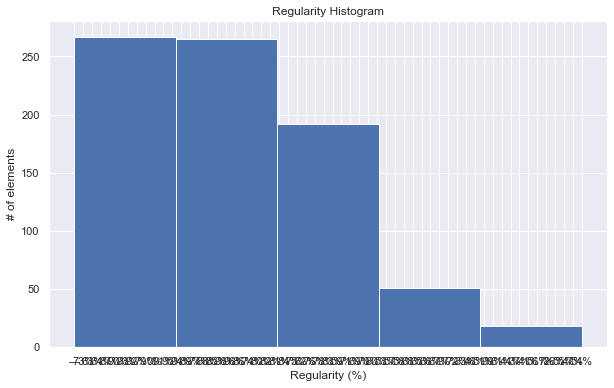

In [780]:
# See the regularity values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Regularity (%)', histTitle='Regularity Histogram')

Inmediatly we can see the problem, the x axis values are not even in order, we need to fix it by changing our column to float.
I was trying to simple remove % and the tranform to float, but it seems there are some values that are '—', so, we are going to fix them first. I also found a problem where the regularity had a date value for some reason, so I will remove it too.

In [781]:
# Remove the columns that are equal to '—' or 'NaT'
sleepData = sleepData[sleepData['Regularity'] != '—']
sleepData= sleepData[sleepData['Regularity'] != 'NaT']
print(sleepData.head(1))

                Start                 End Sleep Quality Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69%        73%  NaN   

   Steps Alarm mode  Air Pressure (Pa) City  Movements per hour  \
1      0   No alarm                NaN  NaN            5.965321   

   Time in bed (seconds) Window start Window stop  Did snore  Snore time  \
1              24099.076          NaN         NaN       True          60   

   Weather temperature (°F) Weather type Notes  
1                       NaN          NaN   NaN  


In [782]:
# Remove de % symbol frome every number
sleepData['Regularity'] = sleepData['Regularity'].astype('str')
sleepData['Regularity'] = sleepData['Regularity'].str.strip('%')
sleepData['Regularity'] = sleepData['Regularity'].astype('float')

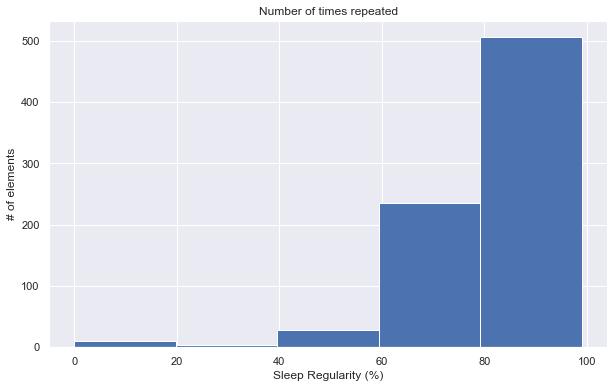

In [783]:
# See the regularity values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Sleep Regularity (%)', histTitle='Number of times repeated')

##### 4.1.2.2. Sleep Quality  should be a Number

In [784]:
# Remove the columns that are equal to '—' or 'NaT'
sleepData = sleepData[sleepData['Sleep Quality'] != '—']
sleepData= sleepData[sleepData['Sleep Quality'] != 'NaT']
print(sleepData.head(1))

                Start                 End Sleep Quality  Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69%        73.0  NaN   

   Steps Alarm mode  Air Pressure (Pa) City  Movements per hour  \
1      0   No alarm                NaN  NaN            5.965321   

   Time in bed (seconds) Window start Window stop  Did snore  Snore time  \
1              24099.076          NaN         NaN       True          60   

   Weather temperature (°F) Weather type Notes  
1                       NaN          NaN   NaN  


In [785]:
# Remove de % symbol frome every number
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].astype('str')
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].str.strip('%')
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].astype('float')

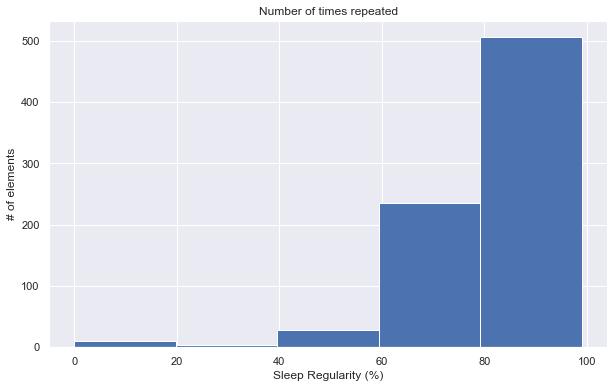

In [786]:
# See the sleep quality values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Sleep Regularity (%)', histTitle='Number of times repeated')

##### 4.1.2.3. Add time in bed in hours

In [787]:
# Create new column for time in bed in hours
sleepData['Time in bed (hours)'] = sleepData['Time in bed (seconds)'] / 3600
print(sleepData.head(1))

                Start                 End  Sleep Quality  Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69.0        73.0  NaN   

   Steps Alarm mode  Air Pressure (Pa) City  Movements per hour  \
1      0   No alarm                NaN  NaN            5.965321   

   Time in bed (seconds) Window start Window stop  Did snore  Snore time  \
1              24099.076          NaN         NaN       True          60   

   Weather temperature (°F) Weather type Notes  Time in bed (hours)  
1                       NaN          NaN   NaN             6.694188  


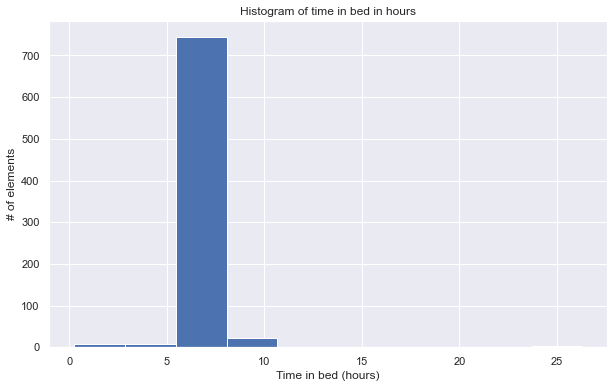

In [788]:
# Histogram for showing time in bed in hours occurencies
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

We can see some out of range elements that we will fix in the next section

##### 4.1.2.4. Column only for the hours and minutes of the start and end cols

In [789]:
# New cols for start and end hours and minutes only
sleepData['Start Hour'] = sleepData['Start'].dt.strftime('%H:%M')
sleepData['End Hour'] = sleepData['End'].dt.strftime('%H:%M')
print(sleepData.head(1))

                Start                 End  Sleep Quality  Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69.0        73.0  NaN   

   Steps Alarm mode  Air Pressure (Pa) City  Movements per hour  ...  \
1      0   No alarm                NaN  NaN            5.965321  ...   

   Window start Window stop Did snore  Snore time  Weather temperature (°F)  \
1           NaN         NaN      True          60                       NaN   

   Weather type Notes Time in bed (hours)  Start Hour End Hour  
1           NaN   NaN            6.694188       02:31    09:13  

[1 rows x 21 columns]


### 4.2 Range constraints
Some situations can cause the app to record too long or too short sessions. We want to check with a histogram if this is the case and correct it.

#### 4.2.1 Sleep time (Hours) range constraints
There are some days where I forgot to turn off the alarm and others where I tried to measure naps, this would be outliers in our data set.

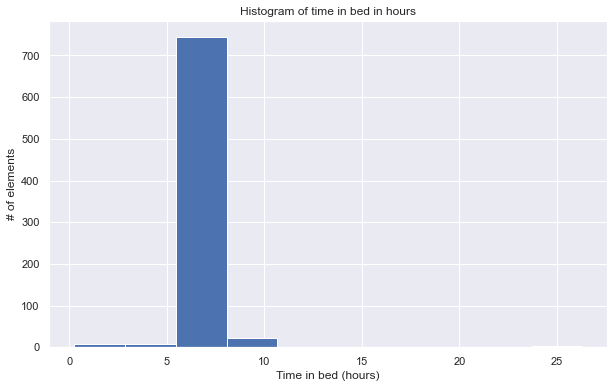

In [790]:
# Histogram for looking at outliers
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

As we can see, there are some values that are extremely out of range, that is why we will apply range constrictions and only allow values over 4 hours and under 10 hours of sleep.

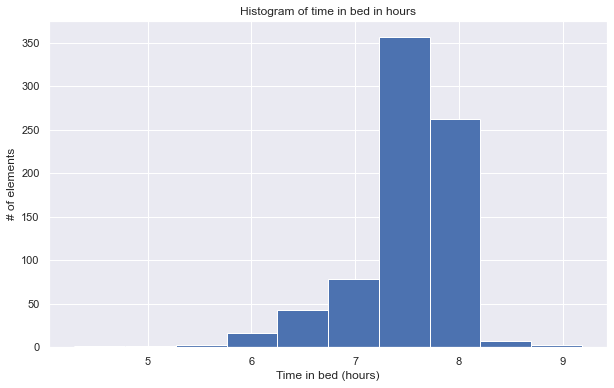

In [791]:
# Correct ranges
sleepData = sleepData[(sleepData['Time in bed (hours)'] < 10) & (sleepData['Time in bed (hours)'] > 4)]

# Histogram for correct times
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

In [792]:
#Check if we deleted too many rows
sleepData.shape

(773, 21)

As we applied this to all the rows, we don't need to repeat the operation for the time in seconds, as they were already dropped.

#### 4.2.2 Movements per night constraints

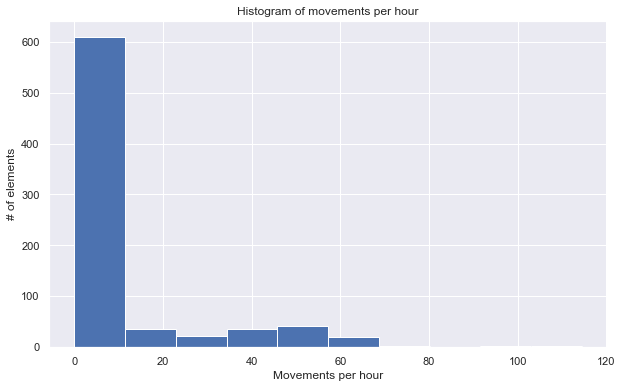

In [793]:
# Histogram for looking outliers in the movements I did at night
plotHist(column=sleepData['Movements per hour'], binNum=10, lab= 'Movements per hour', histTitle='Histogram of movements per hour')

In [794]:
#Number of ocurrencies
sleepData['Movements per hour'].value_counts(bins=10, ascending=True)

(80.135, 91.582]       1
(91.582, 103.03]       2
(103.03, 114.478]      2
(68.687, 80.135]       3
(57.239, 68.687]      20
(22.896, 34.343]      23
(11.448, 22.896]      35
(34.343, 45.791]      36
(45.791, 57.239]      41
(-0.115, 11.448]     610
Name: Movements per hour, dtype: int64

Now, we can see some outliers, probably because I used the app on trips where there could be more than one person per room. We are going to remove the ones where we have more than 95 movements and less than 0.

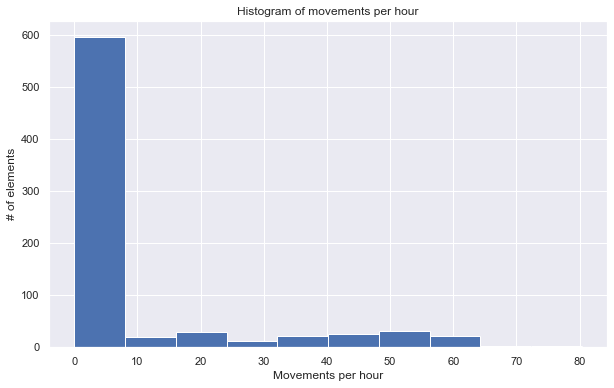

In [795]:
#Remove outliers
sleepData = sleepData[(sleepData['Movements per hour'] > 0) & (sleepData['Movements per hour'] < 95)]

# Histogram for looking how many movements I did
plotHist(column=sleepData['Movements per hour'], binNum=10, lab= 'Movements per hour', histTitle='Histogram of movements per hour')

In [796]:
# See if we deleted too many rows
sleepData.shape

(762, 21)

I was initially planning on deleting values that were 0, however, I found that I would loose an big amount of rows and same problem happened with step counts. We can not delete them as that would remove too much data, but we shall not use them as much, as we know that most of their values are 0.

## 5. EDA Overview
Now it's time to see some of the results of the data analysis

In [797]:
# All the variables we will analyze
quality = sleepData['Sleep Quality']
hoursInBed = sleepData['Time in bed (hours)']
secondsInBed = sleepData['Time in bed (seconds)']


### 5.1 Sleep Quality Analysis
Here we are going to make analysis about factors that affect the sleep quality

#### 5.1.1 Sleep Quality vs Time in bed in Hours
We want to find how much time is the optimal time for sleeping with the highest quality

0.5392030814033867

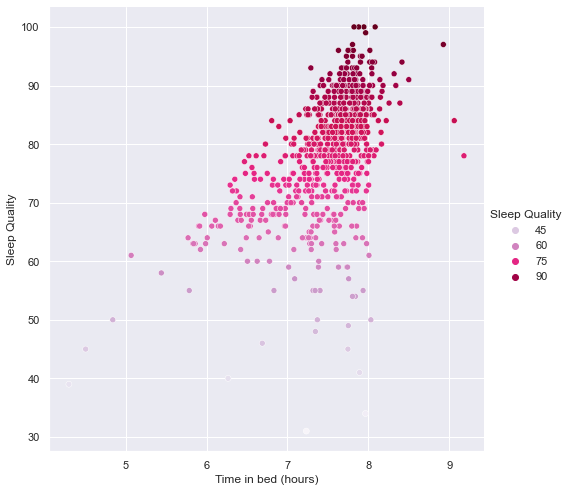

In [822]:
# Plot that shows the relation between sleep quality and time in bed in hours
sns.set_palette("GnBu")
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = sleepData, hue= sleepData['Sleep Quality'], palette='PuRd' ,height=7, aspect=1)
sleepData['Sleep Quality'].corr(sleepData['Time in bed (hours)']) 
